In [30]:
#Visualisation packages
import matplotlib.pyplot as plt

#Computational packages
import numpy as np

In [38]:
#Load the image from the data folder
raw_image = 'data/800px-Unequalized_Hawkes_Bay_NZ.jpg'
color_image_file = 'data/color_image_vis.jpg'
image = plt.imread(raw_image)

In [32]:
#Raw Image (Applied: gray color map onto it)
plt.subplot(1,2,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

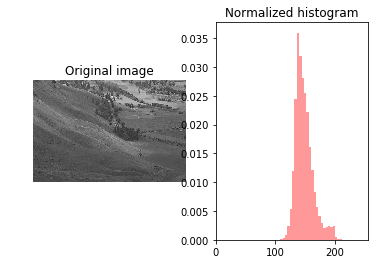

In [33]:
# Flatten the image into 1 dimension: pixels
pixels = image.flatten() #flattening into 1D

# Histogram of the flattened 1D
plt.subplot(1,2,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels, bins=64, color='red', alpha=0.4, range=(0,256), normed=True)

# Display
plt.show()

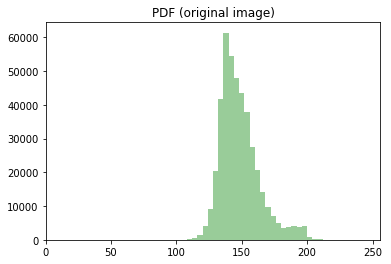

In [34]:
# PDF of the pixel intensities
pdf = plt.hist(pixels, bins=64, range=(0,256), normed=False, color='green', alpha=0.4)

plt.xlim((0,256))
plt.grid('off')
plt.title('PDF (original image)')
plt.show()

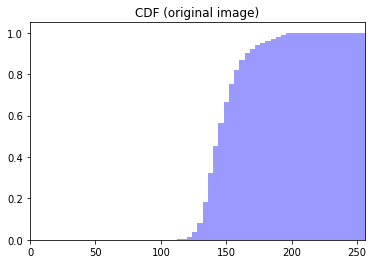

In [35]:
# CDF of the pixel intensities
cdf = plt.hist(pixels, bins=64, range=(0,256), normed=True, cumulative=True, color='blue', alpha=0.4)
               
plt.xlim((0,256))
plt.grid('off')
plt.title('CDF (original image)')
plt.show()

# Histogram Equalisation 

Histogram equalization is an image processing procedure that reassigns image pixel intensities. The basic idea is to use interpolation to map the original CDF of pixel intensities to a CDF that is almost a straight line. In essence, the pixel intensities are spread out and this has the practical effect of making a sharper, contrast-enhanced image. 

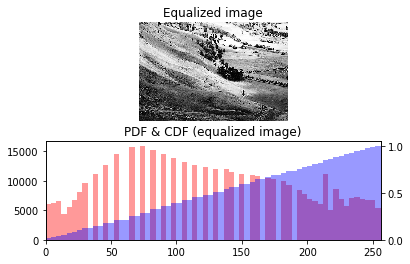

In [36]:
# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

new_image = np.reshape(new_pixels, newshape=image.shape) #Reshape as a 2D Array

plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap='gray') #New Image with color map of 'grey'

# Histogram of new_pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False, color='red', alpha=0.4)
plt.grid('off')

# Overlaying CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (equalized image)')

# Ccumulative histogram of the new_pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256), cumulative=True, normed=True, color='blue', alpha=0.4)
plt.show()

# Extracting Histogram from Colored Image

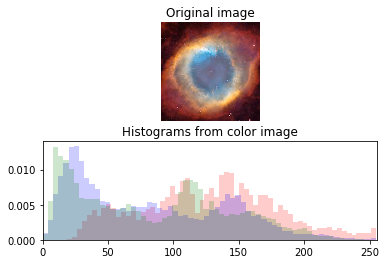

In [39]:
color_image = plt.imread(color_image_file)
# Original Image
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(color_image)

red, green, blue = color_image[:,:,0], color_image[:,:,1], color_image[:,:,2] #Extracting 2D arrays for RGB

# Flattening the arrays into 1D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlaid Histogram of RGC
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)

# Display
plt.show()

# Extracting Bivariate histogram from the colored image

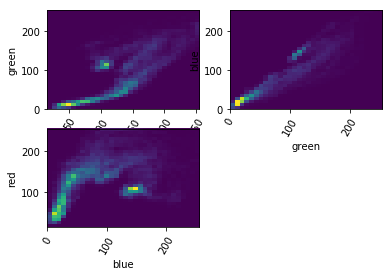

In [41]:
# 2D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels, green_pixels, bins=(32,32))

# 2D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels, blue_pixels, bins=(32,32))

# 2D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels, red_pixels, bins=(32,32))

# Display
plt.show()